In [1]:
# HOUSE PRICE PREDICTION 

In [2]:
# Import libraries 

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
palette = "mako"

import pickle

In [4]:
# Read the dataset

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.shape

(21613, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- We  note that the interval for each variable is different. This means that scaling has to be performed on the entire data set to make the data suitable for different algorithms.

In [10]:
# remove id (useless)
df.drop("id",axis=1,inplace=True)

In [11]:
# to date
df['date'] = pd.to_datetime(df['date'])

In [12]:
# there are 2 null records in the dataset in the column "sqft_above"
# fill nan in sqft_above with mean

df['sqft_above'].fillna(df['sqft_above'].mean(), inplace=True)

In [13]:
# Exploratory Data Analysis (EDA)

In [14]:
# Price (Target variable)

<Axes: >

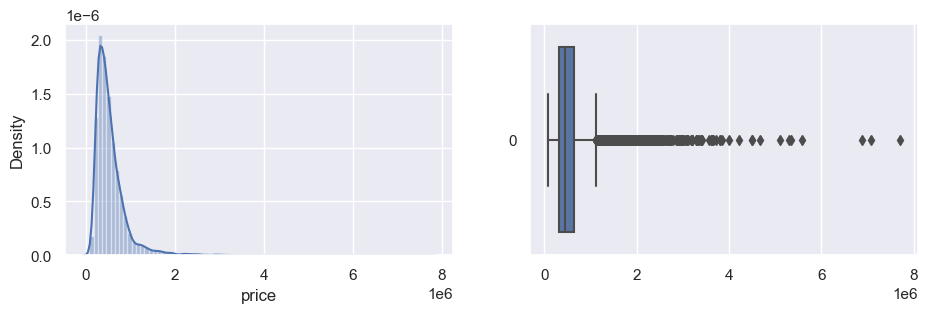

In [15]:
plt.figure(figsize=[11,3])

plt.subplot(1, 2, 1)
sns.distplot(df['price'], bins=80)
plt.subplot(1, 2, 2)
sns.boxplot(df['price'], orient='horizontal')

- It is important to note that our target variable not following a normal distribution can have implications on the choice and interpretation of certain statistical models and analysis techniques.

In [16]:
# Autre variables (numerical)

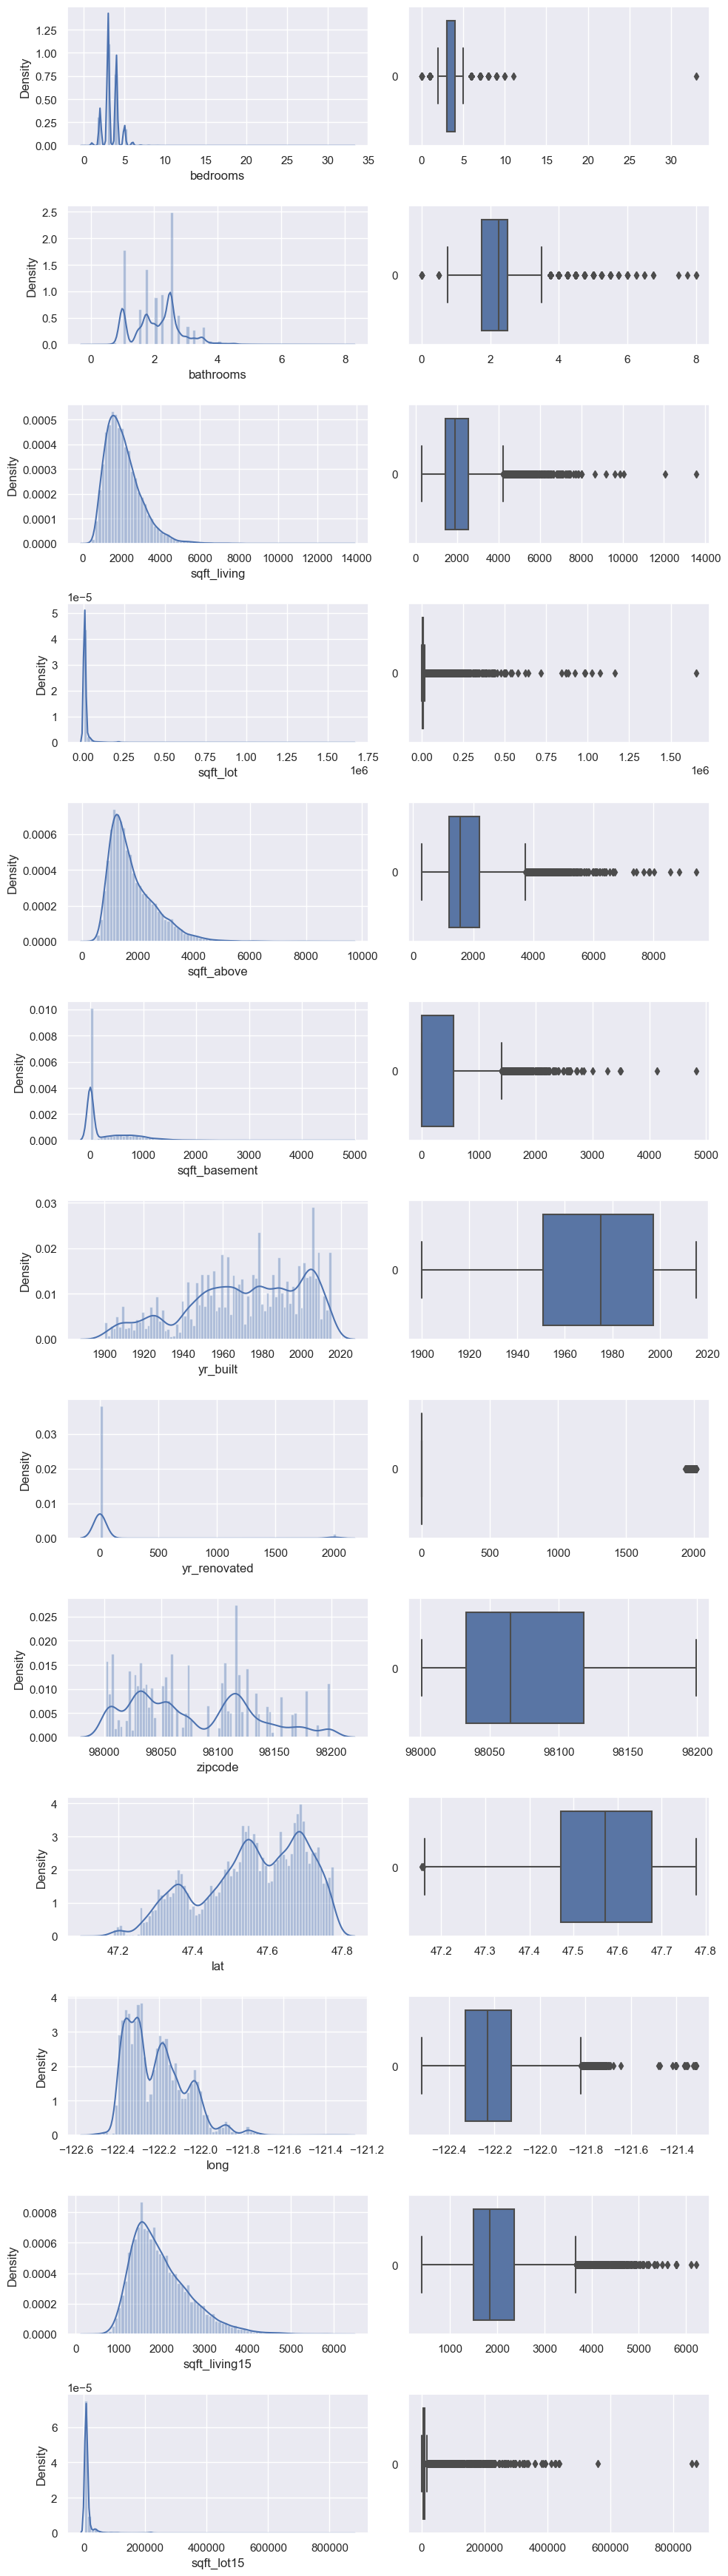

In [17]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement',
           'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']

plt.figure(figsize=[10, 35])

for i, col in enumerate(columns):
    plt.subplot(len(columns), 2, i*2 + 1)
    sns.distplot(df[col], bins=80)
    plt.subplot(len(columns), 2, i*2 + 2)
    sns.boxplot(df[col], orient='horizontal')

plt.tight_layout()
plt.show()

- We can see from the figures above that there are outliers in the columns (sqft_lot, sqft_lot15 and sqft_basement). 

In [18]:
def count_outliers_iqr(data, column, threshold=1.5):
    column_data = data[column]
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    num_outliers = len(outliers)
    print("Number of outliers in column '{}': {}".format(column, num_outliers))

In [19]:
colmuns = ['sqft_lot', 'sqft_lot15','sqft_basement']

for col in colmuns:
    count_outliers_iqr(df, col)

Number of outliers in column 'sqft_lot': 2425
Number of outliers in column 'sqft_lot15': 2194
Number of outliers in column 'sqft_basement': 496


In [20]:
# remove outliers IQR

def remove_outliers_iqr(df, columns, threshold=1.5):
    cleaned_df = df.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (threshold * iqr)
        upper_bound = q3 + (threshold * iqr)
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    return cleaned_df

In [21]:
colmuns = ['sqft_lot', 'sqft_lot15','sqft_basement']

filtered_data = remove_outliers_iqr(df, colmuns)

In [22]:
print("Number of outliers removed from the data : {}".format(len(df)-len(filtered_data)))

Number of outliers removed from the data : 3029


In [23]:
# the columns (sqft_lot, sqft_lot15 and sqft_basement) after removing the outliers 

<Axes: >

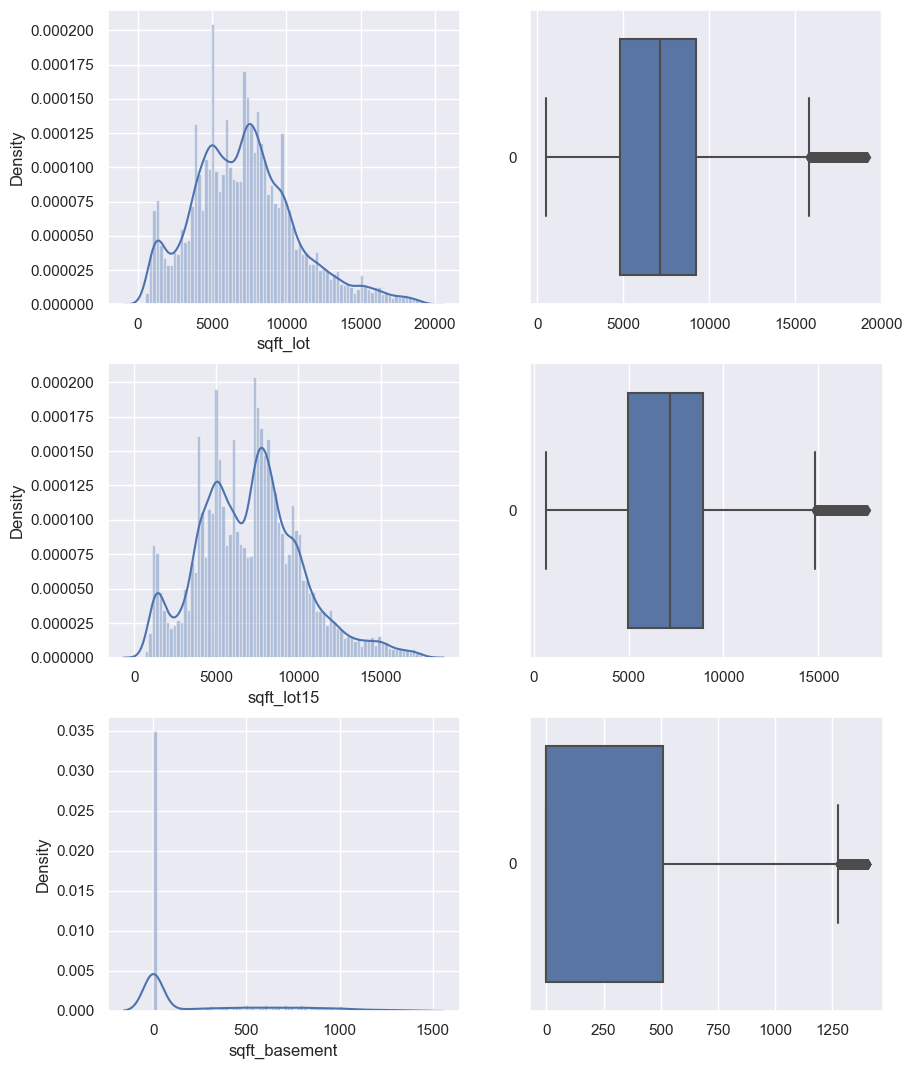

In [24]:
plt.figure(figsize=[10,10])

plt.subplot(3, 2, 1)
sns.distplot(filtered_data['sqft_lot'], bins=80)
plt.subplot(3, 2, 2)
sns.boxplot(filtered_data['sqft_lot'], orient='horizontal')
plt.subplot(3, 2, 3)
sns.distplot(filtered_data['sqft_lot15'], bins=80)
plt.subplot(3, 2, 4)
sns.boxplot(filtered_data['sqft_lot15'], orient='horizontal')
plt.subplot(3, 2, 5)
sns.distplot(filtered_data['sqft_basement'], bins=80)
plt.subplot(3, 2, 6)
sns.boxplot(filtered_data['sqft_basement'], orient='horizontal')

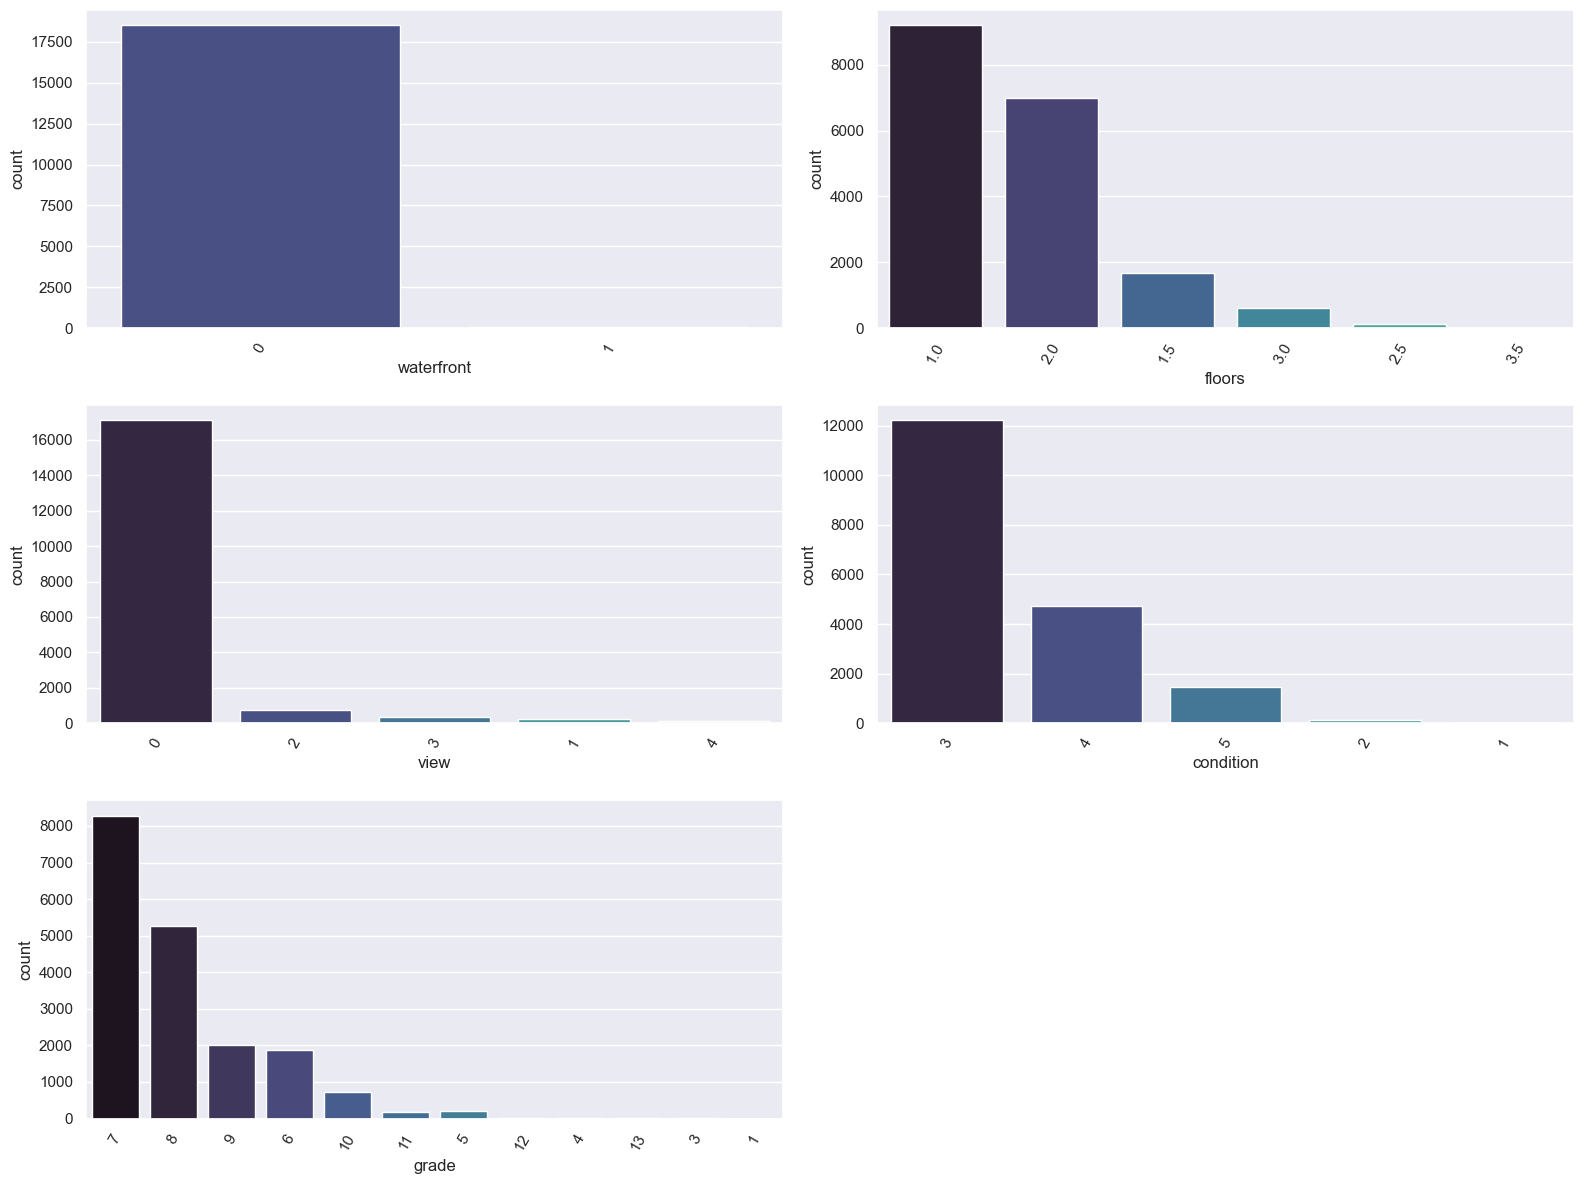

In [25]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.xticks(rotation=60)
sns.countplot(x='waterfront', data=filtered_data, palette=palette, order=df["waterfront"].value_counts().index)

plt.subplot(3, 2, 2)
plt.xticks(rotation=60)
sns.countplot(x='floors', data=filtered_data, palette=palette, order=df["floors"].value_counts().index)


plt.subplot(3, 2, 3)
plt.xticks(rotation=60)
sns.countplot(x='view', data=filtered_data, palette=palette, order=df["view"].value_counts().index)

plt.subplot(3, 2, 4)
plt.xticks(rotation=60)
sns.countplot(x='condition', data=filtered_data, palette=palette, order=df["condition"].value_counts().index)

plt.subplot(3, 2, 5)
plt.xticks(rotation=60)
sns.countplot(x='grade', data=filtered_data, palette=palette, order=df["grade"].value_counts().index)


plt.tight_layout()
plt.show()

- we can see that the "waterfront" and "view" columns is highly unbalanced

In [26]:
# df.drop("waterfront",axis=1,inplace=True)
# df.drop("view",axis=1,inplace=True)

In [27]:
# relations with price

<Axes: >

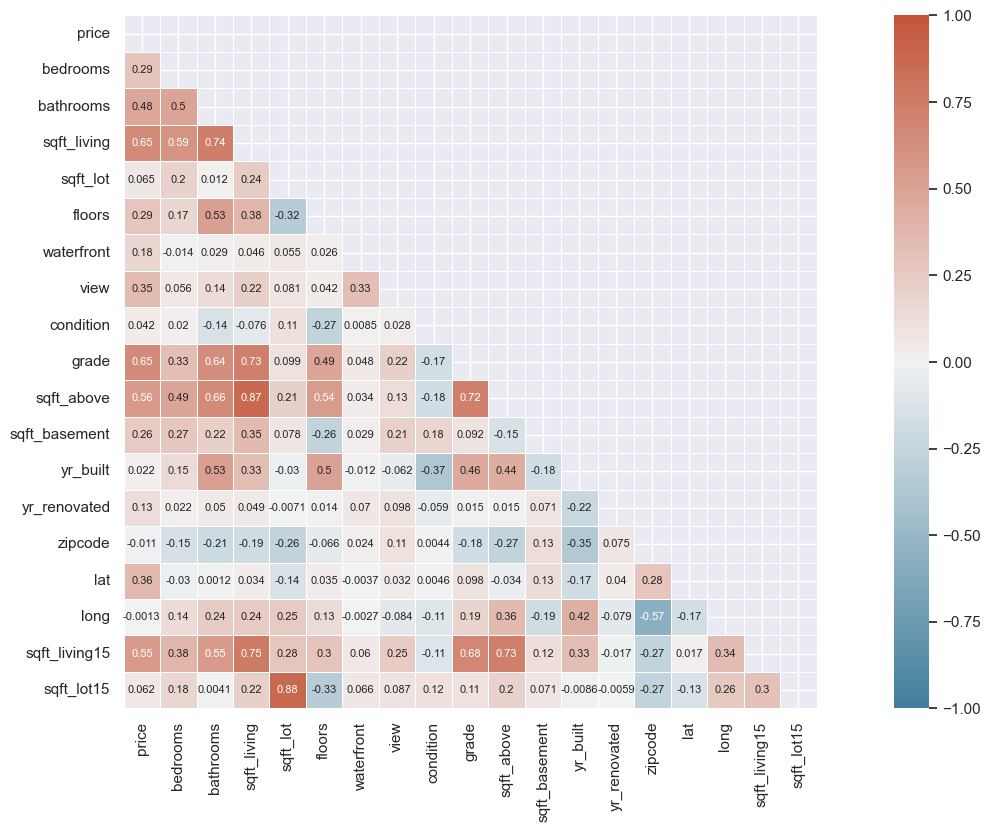

In [28]:
# corr matrix

corr = filtered_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True,annot_kws={"fontsize":8}, cmap=cmap, vmax=1,vmin=-1,
            center=0, square=True, linewidths=.5)

In [29]:
#filtered_data.drop("sqft_lot",axis=1,inplace=True)
#filtered_data.drop("condition",axis=1,inplace=True)
#filtered_data.drop("yr_built",axis=1,inplace=True)
#filtered_data.drop("zipcode",axis=1,inplace=True)
#filtered_data.drop("long",axis=1,inplace=True)
#filtered_data.drop("sqft_lot15",axis=1,inplace=True)

- **Note :** I've tried removing each of these features that have a low correlation with the target, but the model doesn't improve.

In [30]:
filtered_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Machine Learning

In [31]:
# !pip install pycaret
# !pip install catboost
# !pip install xgboost

In [32]:
from pycaret.regression import *

s = setup(data=filtered_data, 
          target='price',
          train_size=0.8,
          #max_encoding_ohe = 100,
          #feature_selection=True,
          #feature_selection_method="sequential",
          #feature_selection_estimator="catboost",
          #n_features_to_select=0.70,
          normalize=True,
          normalize_method="zscore",
          #normalize_method="minmax",
          transformation=True,
          transformation_method = 'yeo-johnson',
          transform_target=True,
          transform_target_method='yeo-johnson',
          fold=5,
          session_id=99,
          #log_experiment=True,
          #experiment_name="comparer_all",
          # use_gpu=True
          )

,Description,Value
0,Session id,99
1,Target,price
2,Target type,Regression
3,Original data shape,"(18584, 20)"
4,Transformed data shape,"(18584, 22)"
5,Transformed train set shape,"(14867, 22)"
6,Transformed test set shape,"(3717, 22)"
7,Numeric features,18
8,Date features,1
9,Preprocess,True


In [33]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,53118.1456,7898986742.0570,88791.2901,0.9055,0.1504,0.1090,4.6060
lightgbm,Light Gradient Boosting Machine,56591.6634,9140714984.0610,95466.8305,0.8906,0.1575,0.1148,1.0540
xgboost,Extreme Gradient Boosting,57117.5008,9370770329.6000,96712.8812,0.8878,0.1603,0.1165,1.4020
rf,Random Forest Regressor,61486.0868,11795897503.8149,108515.4689,0.8588,0.1707,0.1227,5.6340
et,Extra Trees Regressor,61359.4246,11863630552.7932,108787.9249,0.8580,0.1713,0.1224,5.9960
gbr,Gradient Boosting Regressor,66492.3402,12934501181.5251,113561.2376,0.8452,0.1770,0.1314,2.0620
knn,K Neighbors Regressor,86480.8047,20854176153.6000,144155.5219,0.7503,0.2277,0.1728,1.2020
dt,Decision Tree Regressor,88396.8159,22436081671.5815,149737.2373,0.7312,0.2427,0.1789,0.7400
lr,Linear Regression,100034.3249,26250240542.8153,161893.0386,0.6857,0.2532,0.1969,2.9400
ridge,Ridge Regression,100097.7948,26520311231.9792,162708.6488,0.6826,0.2541,0.1968,0.7480


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

We note that all three outranked algorithms are **tree-based algorithms**, and as we know, tree-based algorithms are methods that don't benefit from **scaling** and don't require the data set to follow a **normal distribution** **(Transformation)**. We therefore decided to reset the pycaret environment without scaling or transformation. We will then train and evaluate the three upgraded models in the new environment.

In [34]:
from pycaret.regression import *

s = setup(data=filtered_data, 
          target='price',
          train_size=0.8,
          fold=5,
          session_id=99,
          )

,Description,Value
0,Session id,99
1,Target,price
2,Target type,Regression
3,Original data shape,"(18584, 20)"
4,Transformed data shape,"(18584, 22)"
5,Transformed train set shape,"(14867, 22)"
6,Transformed test set shape,"(3717, 22)"
7,Numeric features,18
8,Date features,1
9,Preprocess,True


In [35]:
# create model (catboost)

In [36]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51991.6596,7042931551.6964,83922.1756,0.9140,0.1494,0.1106
1,54481.4648,8114745237.3046,90081.8807,0.9001,0.1585,0.1162
2,53952.8319,7419473038.3670,86136.3630,0.9124,0.1494,0.1106
3,53830.6243,7413340683.2683,86100.7589,0.9063,0.1545,0.1149
4,53437.2446,8921641345.4477,94454.4406,0.9014,0.1522,0.1112
Mean,53538.7650,7782426371.2168,88139.1238,0.9069,0.1528,0.1127
Std,842.5150,666792102.7191,3731.1169,0.0056,0.0034,0.0024


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
# test score

In [38]:
predict_catboost = predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,54458.9338,8271058249.9503,90945.3586,0.9110,0.1521,0.1124


- **Test Score** : 91,10% (R2)

In [42]:
# tune model 

In [42]:
catboost_grid = {
                 'iterations':[50,100,250,500,750,1000,1500,2000],
                 'learning_rate':[0.001,0.03,0.01,0.1], 
                 'depth':[4,5,6,7,8,9,10],
                 'l2_leaf_reg':[2,3,5,7,10],
                 'random_strength':[0.05,0.1,1,3,5,7,10]
                 }
                 
#tuned_catboost = tune_model(catboost, custom_grid=catboost_grid, search_library="scikit-optimize",n_iter=500, tuner_verbose=10)
tuned_catboost = tune_model(catboost, custom_grid=catboost_grid,search_library="scikit-optimize",
                            n_iter=50, tuner_verbose=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,52183.3188,7018861087.4404,83778.6434,0.9143,0.1504,0.1106
1,54190.0483,8133680247.3000,90186.9184,0.8999,0.1584,0.1155
2,53392.0861,7293029567.8408,85399.2363,0.9139,0.1514,0.1103
3,54414.4369,7464508016.3138,86397.3843,0.9057,0.1564,0.1158
4,52795.2851,8642823517.1832,92966.7872,0.9045,0.1522,0.1106
Mean,53395.0351,7710580487.2157,87745.7939,0.9077,0.1537,0.1125
Std,836.5634,593543028.4551,3355.0166,0.0056,0.0031,0.0025


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
## this step requires a lot of time (without GPU) to obtain the best hyperparameters and improve the model. 
## we tried just  n_iter = 50

In [ ]:
# test score (tuned model)

In [43]:
predict_catboost = predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,53364.8268,8179695332.3981,90441.6681,0.9120,0.1518,0.1105


- **Test Score** : 91,20% (R2)

## Prediction Error Plot

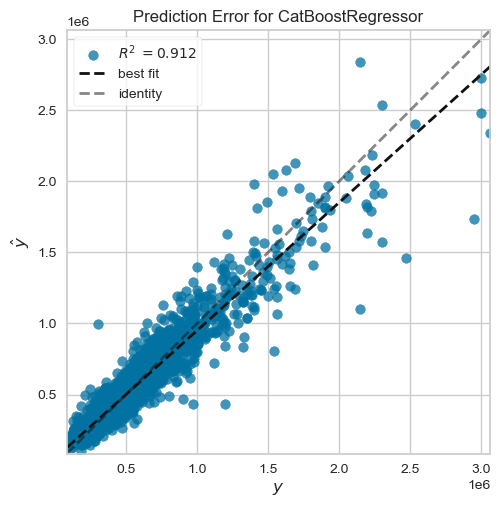

In [44]:
plot_model(tuned_catboost, plot="error")

## Residual Plot

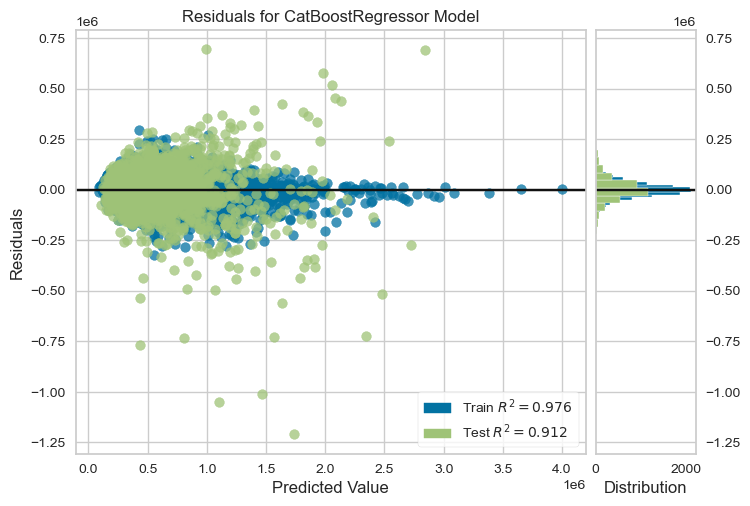

In [45]:
plot_model(tuned_catboost, plot="residuals")

## Learning Curve

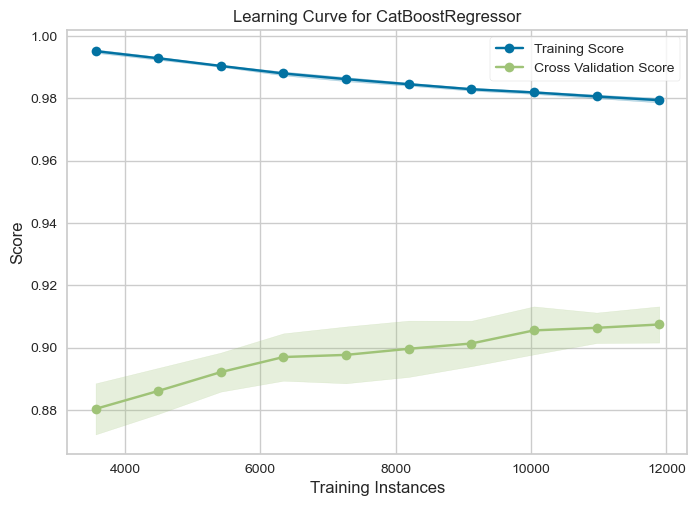

In [46]:
plot_model(tuned_catboost, plot="learning")

- The graph shows that the training score decreases and the test score increases, which is a sign of adequacy. We could probably improve adequacy by tuning hyperparameters, selecting features or adding "good data".

Another way of analyzing model performance is to use the ***evaluate_model*** function, which aﬀiches a user interface for all the graphics available for a given model.

In [47]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize the model

The model is likely to perform better if trained on the whole set of available data than on the single subset used to estimate model performance.

In [48]:
final_catboost_model = finalize_model(tuned_catboost)

## Make a prediction about a new house

In [49]:
sample = {}

sample['bedrooms'] = 4
sample['bathrooms'] = 4.5
sample['sqft_living'] =    5120
sample['sqft_lot'] = 41327
sample['floors'] = 2.0
sample['waterfront'] = 0
sample['view'] = 0
sample['condition'] = 3
sample['grade'] = 10
sample['sqft_above'] = 3290.0
sample['sqft_basement'] = 1830
sample['yr_built'] = 2008
sample['yr_renovated'] = 0
sample['zipcode'] = 98053
sample['lat'] =  47.7009
sample['long'] = -122.059
sample['sqft_living15'] = 3360
sample['sqft_lot15'] = 82764
sample['date'] = "2014-12-08"
sample['date'] = pd.to_datetime(sample['date'])

In [50]:
sample = pd.DataFrame([sample])
sample

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,4,4.5,5120,41327,2.0,0,0,3,10,3290.0,1830,2008,0,98053,47.7009,-122.059,3360,82764,2014-12-08


In [51]:
# Predict (final_catboost model)
unseen_predictions = predict_model(final_catboost_model, data = sample)
predicted_price = int(unseen_predictions["prediction_label"][0])

# print result
print("The estimated price is : "+ str(round(predicted_price, 0)))

The estimated price is : 1219109


## Interpreting the prediction

In [52]:
# to plot this you need to install shap (pip install shap)

We'll now use the ***interpate_model*** method to interpret the prediction.

In [53]:
interpret_model(final_catboost_model["actual_estimator"], plot='reason', X_new_sample=sample)

## Save the model

In [56]:
import joblib

joblib.dump(final_catboost_model, 'final_catboost_model.pkl')

['final_catboost_model.pkl']

## Load the model

In [57]:
final_catboost_model = joblib.load('final_catboost_model.pkl')

In [58]:
final_catboost_model

Pipeline(memory=FastMemory(location=C:\Users\ayaou\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['bedrooms', 'bathrooms',
                                             'sqft_living', 'sqft_lot',
                                             'floors', 'waterfront', 'view',
                                             'condition', 'grade', 'sqft_above',
                                             'sqft_basement', 'yr_built',
                                             'yr_renovated', 'zipcode', 'lat',
                                             'long', 'sqft_living15',
                                             'sqft_lot15'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x00000232ED86F100>)])